# Iterated Maps

Given a function *f*, we can *iterate* *f* by composing *f* with itself. Starting with some initial input called the 'seed', we apply f to the seed to get some output. We then take that output and feed it back into the same function f as input to get another output, etc.  

One simple way of iterating is by entering a number into a calculator and then hitting some function key such as the squaring function over and over again.

Function iteration can be useful for modeling situations in which the same rule is applied over and over again to some initial condition.

We can get an idea about various features that can arise via iteration by considering the squaring function:

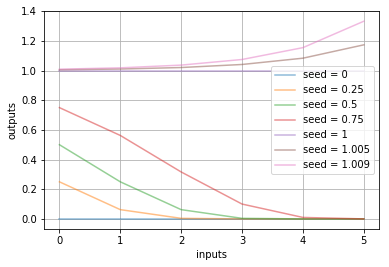

In [1]:
from matplotlib import pyplot as plt 
import numpy as np 


def generate_square (iterations=None, seed=None):
    # initialize an array of 0s 
    x = np.zeros (iterations + 1)
    y = np.zeros (iterations + 1)
    
    # specify starting values
    x[0], y[0] = 0, seed


    # loop over the steps and replace array values with calculations
    for i in range (iterations):
        y[i+1] = y[i] * y[i]
        x[i+1] = x[i] + 1
    
    return x, y

def plot_squares ():
    # plot the figure
    fig, ax = plt.subplots ()
    for seed in [0, 0.25, 0.5, 0.75, 1, 1.005, 1.009]:
        x, y = generate_square (iterations=5, seed=seed)
        ax.plot (x, y, alpha=0.5, label=f'seed = {seed}')
    ax.set (xlabel='inputs', ylabel='outputs')
    plt.grid (True)
    plt.legend ()
    plt.show ()
    
plot_squares () 

Given a seed, we call the result of iterating a function on that seed the *orbit* of that seed.

from the above, we can see that iterating the squaring function leads to different behaviors depending upon the initial seed. If the seed is 0, then all subsequent outputs are 0 as well. Likewise, if the seed is 1, then all subsequent outputs are 1 as well. We call such points *fixed points*. 

Although both 0 and 1 are fixed points, the seeds around them behave very differently. if the seed is between 0 and 1, then the orbit always approaches zero after many iterations. if the seed is larger than 1, then the orbit tends toward infinity. If the initial condition is 0 or 1, then the orbit is fixed.

We call fixed points such as 0 *attractors*, and fixed points such as 1 *repellors*. If we are at 0 and we get pushed away from 0 by a small amount, then we will arrive back at 0. On the other hand, if we are at 1 and we get pushed awawy from 1 by a small amount, then we will never arrive back at 1, but will instead fly away either to infinity or to 1.

By looking at a different function, we can see that iterated functions can display other kinds of behaviors:

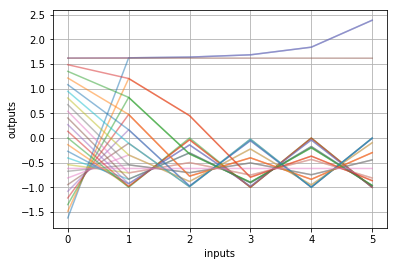

In [2]:
def generate_square_minus_one (iterations=None, seed=None):
    # initialize an array of 0s 
    x = np.zeros (iterations + 1)
    y = np.zeros (iterations + 1)
    
    # specify starting values
    x[0], y[0] = 0, seed


    # loop over the steps and replace array values with calculations
    for i in range (iterations):
        y[i+1] = (y[i] * y[i]) - 1
        x[i+1] = x[i] + 1
    
    return x, y

def plot_squares_minus_one ():
    # plot the figure
    fig, ax = plt.subplots ()
    for seed in np.append (np.linspace(-1.62, 1.62, 25), [1.61803, -0.61803]):
        x, y = generate_square_minus_one (iterations=5, seed=seed)
        ax.plot (x, y, alpha=0.5)
    ax.set (xlabel='inputs', ylabel='outputs')
    plt.grid (True)
    plt.show ()
    
plot_squares_minus_one ()

The above function has fixed points of 1.61803, -0.61803. We can see that both fixed points are repelling.
However, even though both fixed points are repelling, we can also see that all seeds less than 1.61803 which
are not themselves fixed points have orbits that inevitably wind up in a different kind of trap that oscillates 
up and down.

In particular, the orbits oscillate between −1 and 0. We say that these two points, −1 and 0, 
form a *cycle of period 2*, where the period is the minimum number of iterations required to go from 
one point to the other.

One of the most surprising aspects of iterated functions is that we can start with a simple function, and obtain
extremely complex behaviors just by iterating it over and over again. One classic function that is used to 
show this phenomenon is called the *logistic functions*, which is used to predict the number of individuals
in one time period based upon the number of individuals in the previous time period. For simplicity, we will only
vary the r value, and use the same seed for all experiments:

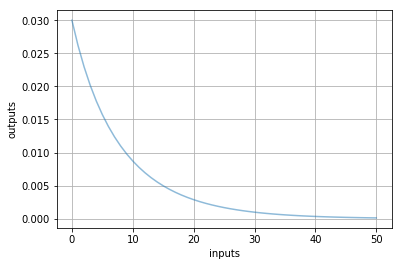

In [3]:
from matplotlib import pyplot as plt 
import numpy as np 


def generate_logistic (iterations=50, r=0.5, seed=0.03):
    # initialize an array of 0s 
    x = np.zeros (iterations + 1)
    y = np.zeros (iterations + 1)
    
    # specify starting values
    x[0], y[0] = 0, seed


    # loop over the steps and replace array values with calculations
    for i in range (iterations):
        y[i+1] = r * y[i] * (1 - y[i])
        x[i+1] = x[i] + 1
    
    return x, y

def plot_logistic (x, y):
    # plot the figure
    fig, ax = plt.subplots ()
    ax.plot (x, y, alpha=0.5)
    ax.set (xlabel='inputs', ylabel='outputs')
    plt.grid (True)
    plt.show ()
    
x, y = generate_logistic (r=0.9)
plot_logistic (x, y)

0 is an attracting point of the above function. As we increase the value of r, the behavior of the orbits changes:

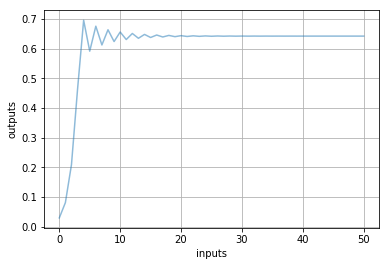

In [4]:
x, y = generate_logistic (r=2.8)
plot_logistic (x, y)

Now, instead of the orbit going directory towards an attracting point, it oscillates around the attracting point 0.64
as it converges towards the attracting point.

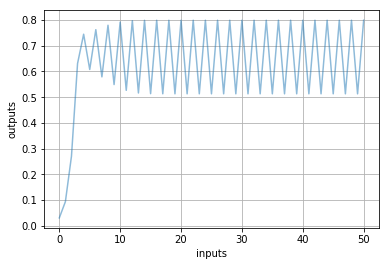

In [5]:
x, y = generate_logistic (r=3.2)
plot_logistic (x, y)

In the above, the orbit is pulled in to a period-two cycle, where the
population oscillates between 0.80 and 0.51. This behavior is attracting, since 
all initial conditions will end up getting pulled in to this period-two cycle.

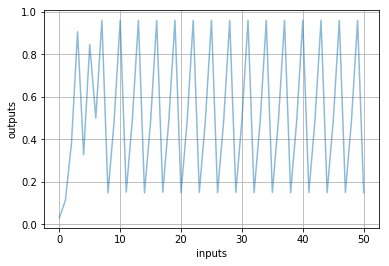

In [6]:
x, y = generate_logistic (r=3.84)
plot_logistic (x, y)

we again see periodic behavior, but this time the period
is *three*, since it takes three iterations for the population to repeat. 
The approximate population values in the cycle are 0.15, 0.49, and
0.96. This is attracting behavior since almost all initial conditions are pulled into
this period-three cycle.

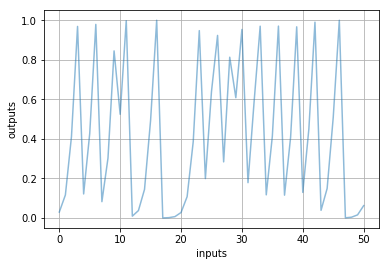

In [8]:
x, y = generate_logistic (r=4.0)
plot_logistic (x, y)

It turns out that trajectories for the logistic equation with
r = 4.0 are both *aperiodic* and *bounded* — they never repeat, and they are confined
to the interval between 0 and 1. One could keep iterating
forever, and the orbit would never return to exactly the
same number from inside of the interval between 0 and 1.

Next, we will see that not only are the orbits random when r = 4, but they are also *unpredictable*.
This fact is called the *butterfly effect*.

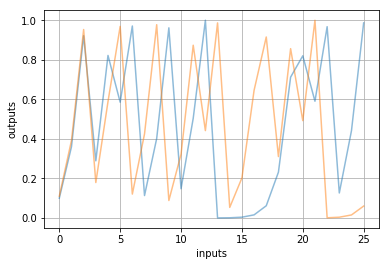

In [9]:
x1, y1 = generate_logistic (iterations=25, r=4.0, seed=0.1)
fig, ax = plt.subplots ()
ax.plot (x1, y1, alpha=0.5)
x2, y2 = generate_logistic (iterations=25, r=4.0, seed=0.11)
ax.plot (x2, y2, alpha=0.5)
ax.set (xlabel='inputs', ylabel='outputs')
plt.grid (True)
plt.show ()

The two orbits start off close together and for the first three or
four iterates they remain fairly close. However, the two orbits are
quite different by the fifth time step. Subsequently, the two orbits
seem uncorrelated.

We can better visualize this divergence by plotting the difference between the two orbits:

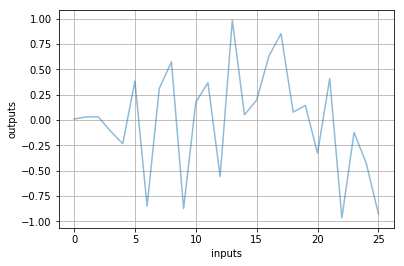

In [10]:
x1, y1 = generate_logistic (iterations=25, r=4.0, seed=0.1)
fig, ax = plt.subplots ()
x2, y2 = generate_logistic (iterations=25, r=4.0, seed=0.11)
ax.plot (x2, y2 - y1, alpha=0.5)
ax.set (xlabel='inputs', ylabel='outputs')
plt.grid (True)
plt.show ()

If two initial conditions differ by even a small amount, their corresponding orbits will be 
uncorrelated. As a result, if a physical system exhibits this kind of behavior, we cannot
make predictions about it into the distance future, since our measurement of the initial condition
will never be accurate enough to allow us to follow a specific orbit with confidence. The technical
term for this phenomenon is *sensitivity on initial conditions*. 

We define a system to be *chaotic* if it satisfies the following conditions:

1. Its time evolution is given by a deterministic function.
2. Its orbits are bounded by some finite number.
3. Its orbits have sensitive dependence on initial conditions.
4. Its orbits are aperiodic.

Given a function such as the logisitic function, we can see how the behavior changes for different r values. For each r value, we are only interested in the final state of each orbit. For example, if an orbit ends up bouncing between two values in the long run, then we only plot those two values and ignore the intermediate values. Such a graph is called a 'final state' diagram because it only shows the final states for each r value:

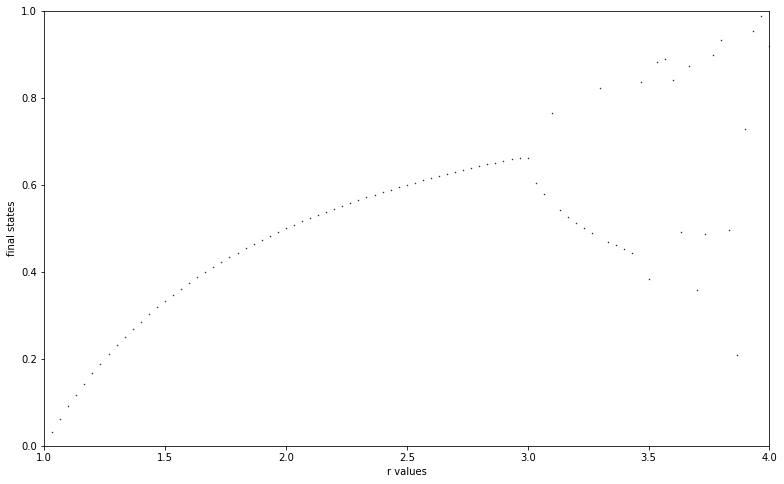

In [11]:
ax = plt.subplot (1,1,1)
ax.set_xlim (1, 4)
ax.set_ylim (0, 1)
ax.set (xlabel='r values', ylabel='final states')

inputs = []
outputs = []

r_values = np.linspace (0.7, 4, 100)

for r in r_values:
    inputs.append (r)
    # pick a random seed and iterate
    # to find the final state
    x = np.random.random ()

    for _ in range (2000):
         x = (r*x)*(1-x)
    outputs.append (x)

plt.plot (inputs, outputs, 'k.', alpha=1, markersize=0.9)
fig = ax.figure
fig.set_figwidth (13)
fig.set_figheight (8)

A final state diagram is a dictionary that allows us to see the behavior of an iterated function 
at a glance. To determine the behavior of the orbit for a given r value, 
first locate that r value on the horizontal axis. Then, draw a vertical line straight up from that r value. 
If the line you just drew goes through a solid black region of points, then this is an indication that the function is aperiodic for that r value. If the line crosses well-defined “pitchfork tines”, then the number of tines the line
crosses gives the periodicity of the orbit at that r value.

We can make a clearer graph by choosing more r values between 0 and 4:

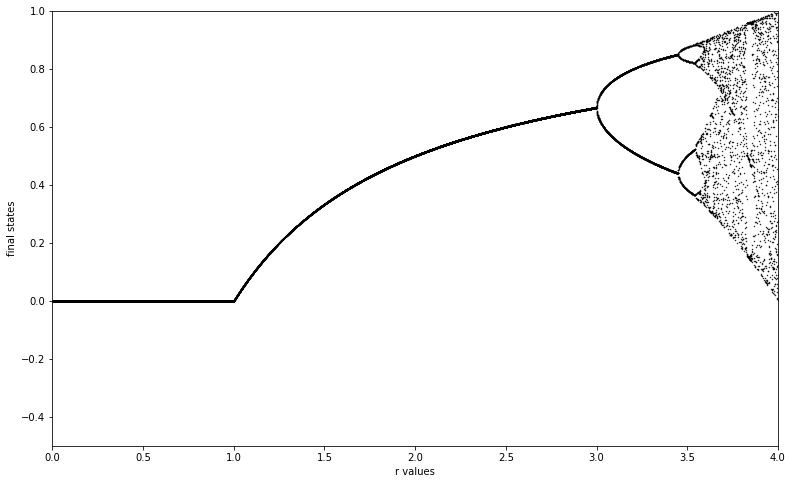

In [12]:
ax = plt.subplot (1,1,1)
ax.set_xlim (0, 4)
ax.set_ylim (-0.5, 1)
ax.set (xlabel='r values', ylabel='final states')

inputs = []
outputs = []

r_values = np.linspace (0, 4, 20000)

for r in r_values:
    inputs.append (r)
    # pick a random seed and iterate
    # to find the final state
    x = np.random.random ()

    for _ in range (2000):
         x = (r*x)*(1-x)
    outputs.append (x)

plt.plot (inputs, outputs, 'k.', alpha=1, markersize=0.9)
fig = ax.figure
fig.set_figwidth (13)
fig.set_figheight (8)

When r is between 0 and 1, there is a single attracting fixed
point at 0.  

For r = 1 to r = 3, there is one non-zero fixed point. 

When r is greater than 3.0, the line on the final state diagram splits in two.
This indicates that we now have period-two behavior; in the long
run orbits are pulled toward an attracting cycle of period two. 

As r increases further still, the two lines in the bifurcation diagram
split again, indicating period-four behavior.
The change in behavior that occurs at r = 3.0 is known as a *period-doubling* bifurcation.

We can see period-4 behavior at around r = 3.5. However, it is hard to see what happens after that. 
We can get a better idea of what happens after r = 3.5 by zooming in on the window from r = 3.4 to r = 4:

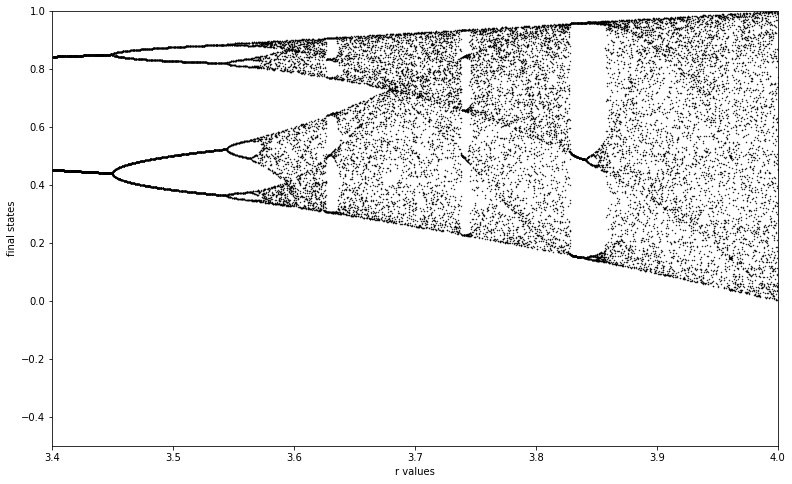

In [13]:
ax = plt.subplot (1,1,1)
ax.set_xlim (3.4, 4)
ax.set_ylim (-0.5, 1)
ax.set (xlabel='r values', ylabel='final states')

inputs = []
outputs = []

r_values = np.linspace (3, 4, 40000)

for r in r_values:
    inputs.append (r)
    # pick a random seed and iterate
    # to find the final state
    x = np.random.random ()

    for _ in range (2000):
         x = (r*x)*(1-x)
    outputs.append (x)

plt.plot (inputs, outputs, 'k.', alpha=1, markersize=0.9)
fig = ax.figure
fig.set_figwidth (13)
fig.set_figheight (8)

We see that the logistic equation’s orbits shift from chaotic to periodic and back again
as r is varied. This is another sense in which a chaotic system can exhibit sensitive dependence.

The final state diagram associated with the logistic equation also has a fractal strucutre, in the sense
that regradless of how far we zoom into the diagram, we see the same strucutres repeating.

# L-Systems -  based on https://nb.paulbutler.org/l-systems/

We can also draw fractals using L-Systems. Before that, we can set up some helper functions:

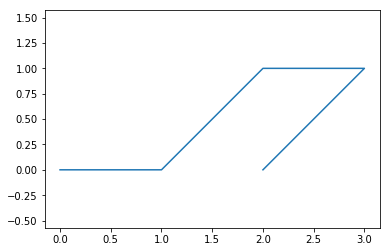

In [14]:
def plot_coords (coords):
    '''plots a list of ordered pairs'''
    plt.axes().set_aspect ('equal', 'datalim')
    X, Y = zip (*coords)
    plt.plot (X, Y)
    
plot_coords([
    (0, 0),
    (1, 0),
    (2, 1),
    (3, 1),
    (2, 0)
])

We can use `nan` to represent a gap in the graph:

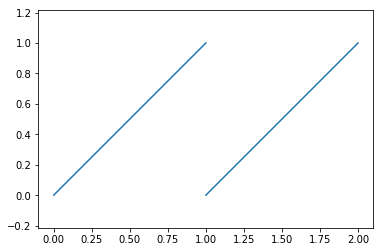

In [15]:
nan = float('nan')
plot_coords([
    (0, 0),
    (1, 1),
    (nan, nan),
    (1, 0),
    (2, 1)
])

Another method of plotting is to simulate a "turtle" that walks around the screen, tracing its route as it goes. This way, instead of calculating coordinates explicitly, we just provide instructions that tell the the turtle what to do. 

For this to work, we need to keep track of three numbers at each step:

1. the x coordinate of the turtle.
2. the y coordinate of the turtle.
3. Which direction the turtle is facing using an angle measure.

The only valid instructions are 'F', 'f', '-', and '+'. Other characters are silently ignored.

'F' means: move forward one unit and trace the path with a line.
'f' means: move forward one unit but don't draw anything.
'-' means: rotate counter-clockwise but don't move.
'+' means: rotate clockwise but don't move.

In [16]:
from math import pi, sin, cos
DEGREES_TO_RADIANS = pi / 180


def turtle_to_coords (turtle_program, turn_amount=45):
    # The state variable tracks the current location and angle of the turtle.
    # The turtle starts at (0, 0) facing up (90 degrees).
    state = (0.0, 0.0, 90.0)
    
    # Throughout the turtle's journey, we "yield" its location. These coordinate
    # pairs become the path that plot_coords draws.
    yield (0.0, 0.0)
    
    # Loop over the program, one character at a time.
    for command in turtle_program:
        x, y, angle = state
        
        if command in 'Ff':      # Move turtle forward
            state = (x - cos(angle * DEGREES_TO_RADIANS),
                     y + sin(angle * DEGREES_TO_RADIANS),
                     angle)
            
            if command == 'f':
                # Insert a break in the path so that
                # this line segment isn't drawn.
                yield (float('nan'), float('nan'))
                
            yield (state[0], state[1])
                        
        elif command == '+':     # Turn turtle clockwise without moving
            state = (x, y, angle + turn_amount)
            
        elif command == '-':     # Turn turtle counter-clockwise without moving
            state = (x, y, angle - turn_amount)

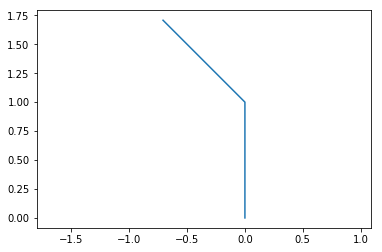

In [17]:
plot_coords (turtle_to_coords ('F-F'))

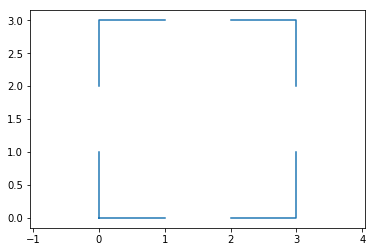

In [18]:
plot_coords (turtle_to_coords ('FfF++FfF++FfF++FfF'))

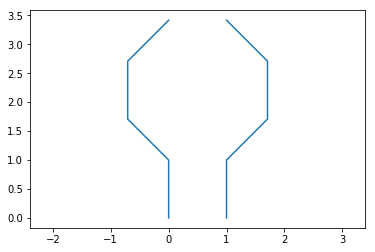

In [19]:
plot_coords (turtle_to_coords ('F-F+F+F+f+F+F+F-F'))

Conceptually, turtle graphics gives us a correspondence between paths in a plot and strings of symbols. This means that we can carry out arbitrarily complex string operations, and then plot the resulitng figure:

In [20]:
def transform_sequence(sequence, transformations):
    return ''.join(transformations.get(c, c) for c in sequence)

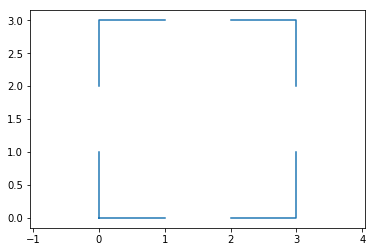

In [21]:
plot_coords (turtle_to_coords(transform_sequence('FFFF', {'F': 'FfF++'})))

Above, we started with a string and applied some rules to it. However, we can treat such a system as a dynamical system, where we apply the same rules over and over again as many times as we like:

In [22]:
def transform_multiple (sequence, transformations, iterations):
    for _ in range(iterations):
        sequence = transform_sequence(sequence, transformations)
    return sequence

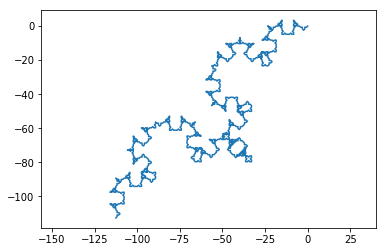

In [23]:
plot_coords (turtle_to_coords (transform_multiple('F', {'F': '+F+F--F+F'}, 5)))

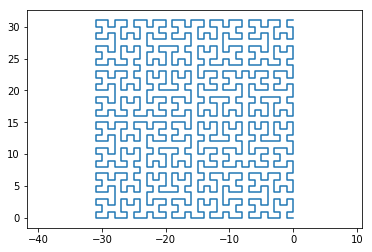

In [24]:
plot_coords(turtle_to_coords(transform_multiple('L', {
    'L': '-RF+LFL+FR-',
    'R': '+LF-RFR-FL+'
}, 5), 90))

So far we've drawn continuous paths. 

It turns out that it's hard to represent the kind of branching that a tree does with a continuous path.

It's easier to represent tree-like branching if we give our turtle a memory. We can use a stack that allows the turrle to push or pop one of two possible symbols. Our turtle now has access to the following two commands: 
1. '[' 
2. ']'. 

One way to think of these commands is that they give our simulated turtle a memory. The '[' command tells the turtle to stay still but remember its current location (including the angle). 

The ']' command tells it to go to the last remembered location. 

Once the turtle goes back to a remembered location it promptly forgets about it, so then the next time ']' is called it goes to the last remembered location before that. 

A consequence of this "forgetting" is that the each ']' must match up with a prior '[', otherwise you are essentially asking the turtle to return to more positions than you told it to remember!

In [27]:
def branching_turtle_to_coords(turtle_program, turn_amount=45):
    saved_states = list()
    state = (0, 0, 90)
    yield (0, 0)

    for command in turtle_program:
        x, y, angle = state

        if command.lower() in 'abcdefghij':        # Move forward (matches a-j and A-J)
            state = (x - cos(angle * DEGREES_TO_RADIANS),
                     y + sin(angle * DEGREES_TO_RADIANS),
                     angle)
            
            if command.islower():                  # Add a break in the line if command matches a-j
                yield (float('nan'), float('nan'))

            yield (state[0], state[1])

        elif command == '+':                       # Turn clockwise
            state = (x, y, angle + turn_amount)

        elif command == '-':                       # Turn counterclockwise
            state = (x, y, angle - turn_amount)

        elif command == '[':                       # Remember current state
            saved_states.append(state)

        elif command == ']':                       # Return to previous state
            state = saved_states.pop()
            yield (float('nan'), float('nan'))
            x, y, _ = state
            yield (x, y)


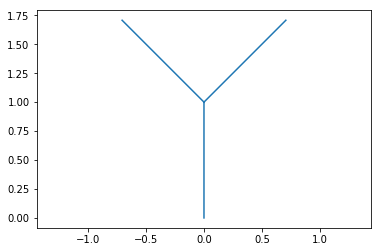

In [28]:
plot_coords (branching_turtle_to_coords('F[-F]+F', 45))

The explanation of the above plot is as follows:

Recall that the turtle starts at (0, 0) facing up. The first F moves the turtle to (0, 1), still pointing up. Then, the '[' command tells the turtle to remember its current position. The turtle then does a counter-clockwise rotation, goes forward, and resumes the remembered location. Then it rotates clockwise (remember, when it returned to its remembered position at (0, 1) it returned to the angle it remembered as well), and goes forward again.

In [29]:
def l_plot (axiom, transformations, iterations=0, angle=45):
    turtle_program = transform_multiple(axiom, transformations, iterations)
    coords = branching_turtle_to_coords(turtle_program, angle)
    plot_coords(coords) # bare_plot removes the axis labels

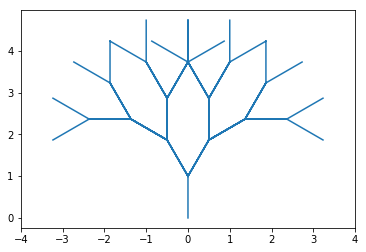

In [30]:
l_plot('F', {'F': 'F[-F][+F]'}, 4, 30)

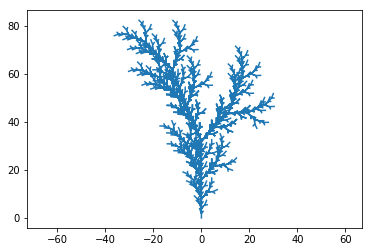

In [31]:
l_plot ('F', {'F': 'FF[++F][-FF]'}, 5, 22)

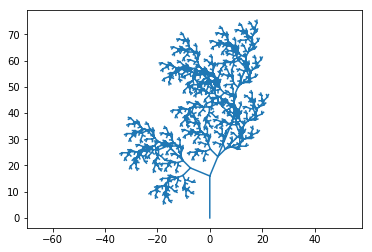

In [32]:
l_plot('A', {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}, 5, 22.5)

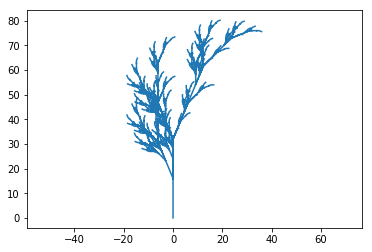

In [33]:
l_plot('X', {'F': 'FF', 'X': ' F-[[X]+X]+F[+FX]-X'}, 5, 22.5)

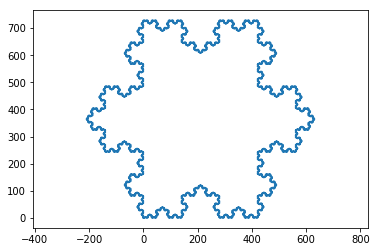

In [34]:
l_plot ('F++F++F', {'F': 'F-F++F-F'}, 6, 60)

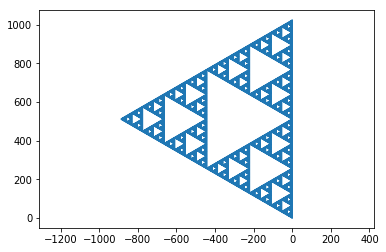

In [35]:
l_plot ('F', {'G': 'F-G-F', 'F': 'G+F+G'}, 10, 60)

An L-System is a symbolic dynamical system. When a larger iterations converge closer and closer to some image, we can view the final image as the attracting state of the dynamical system.